<a href="https://colab.research.google.com/github/sophtsai/Heart-Disease-ML/blob/main/Preprocessing/Sophie_Tsai_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import os
from google.colab import files
from google.colab import drive
from sklearn import preprocessing
import pandas as pd
import numpy as np
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import seaborn as sns
!pip install matplotlib --upgrade
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Mount Google Drive to save checkpoints
MOUNTPOINT = "/content/gdrive"
DATADIR = os.path.join(MOUNTPOINT, "MyDrive")
drive.mount(MOUNTPOINT)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Upload dataset from Personal Key Indicators of Heart Disease
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease 
uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['heart_2020_cleaned.csv'].decode('utf-8')))
df.head()

Saving heart_2020_cleaned.csv to heart_2020_cleaned (2).csv


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# **Visualizations & Exploratory Data Analysis**

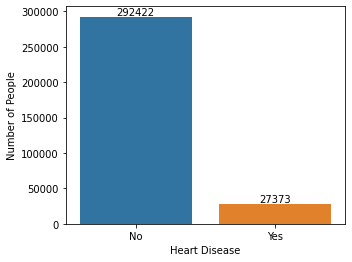

In [5]:
# People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='HeartDisease')
ax.set(xlabel='Heart Disease', ylabel='Number of People')
ax.bar_label(ax.containers[0])
plt.show()

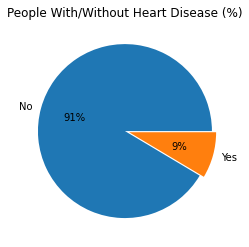

In [6]:
# Percentage of People with/without Heart Disease
fig, ax = plt.subplots(1, 1,figsize =(8, 4))
ax.pie(df['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05))
ax.set_title('People With/Without Heart Disease (%)')
fig.show()

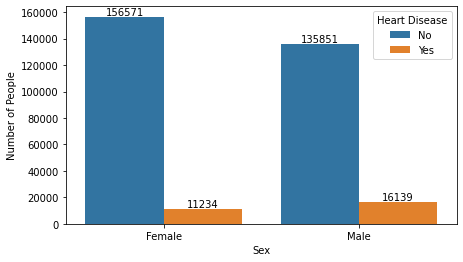

In [7]:
# Sex: People with Heart Disease
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x='Sex', hue='HeartDisease')
ax.set(xlabel='Sex', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

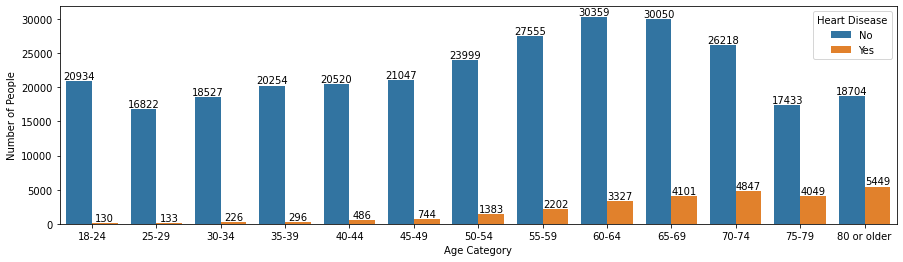

In [8]:
# Age Category: People with Heart Disease
plt.figure(figsize=(15, 4))
ax = sns.countplot(data=df.sort_values(by="AgeCategory"), x='AgeCategory', hue='HeartDisease')
ax.set(xlabel='Age Category', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

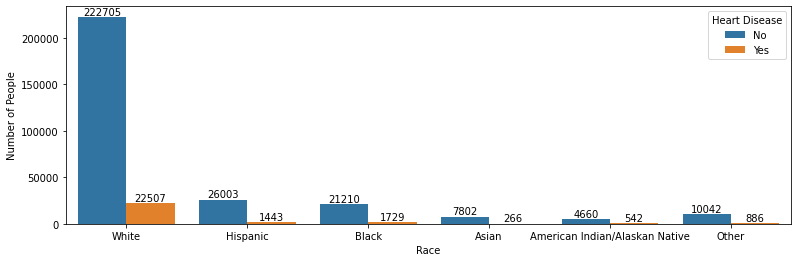

In [9]:
# Race: People with Heart Disease
plt.figure(figsize=(13, 4))
ax = sns.countplot(data=df, x='Race', hue='HeartDisease', order=['White', 'Hispanic', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other'])
ax.set(xlabel='Race', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

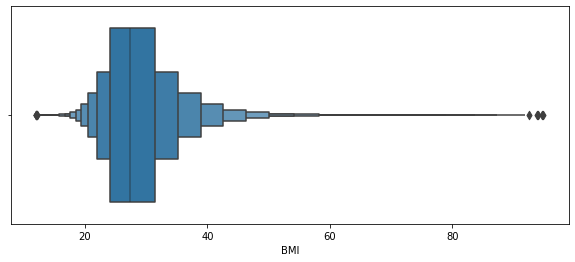

In [10]:
# BMI Boxplot
plt.figure(figsize=(10,4))
sns.boxenplot(x=df.BMI,)
plt.show()

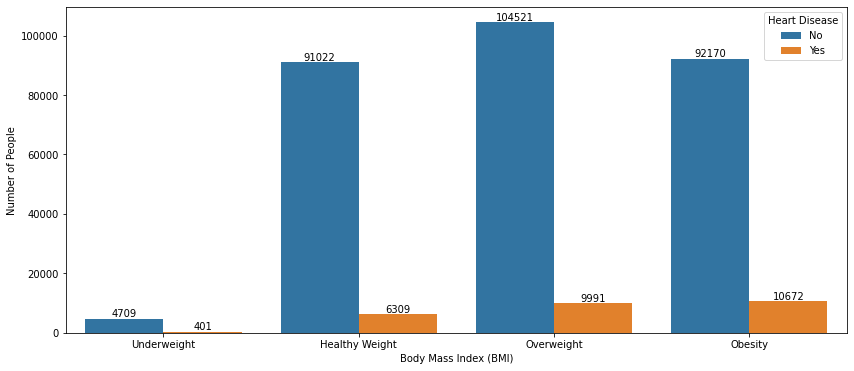

In [11]:
# BMI (Categorized Barplot): People with Heart Disease
df.loc[df['BMI']<18.5, 'BMIGroup'] = 'Underweight'
df.loc[df['BMI'].between(18.5,25,inclusive='left'), 'BMIGroup'] = 'Healthy Weight'
df.loc[df['BMI'].between(25,30,inclusive='left'), 'BMIGroup'] = 'Overweight'
df.loc[df['BMI']>=30, 'BMIGroup'] = 'Obesity'

plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='BMIGroup', hue='HeartDisease')
ax.set(xlabel='Body Mass Index (BMI)', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

<Figure size 360x432 with 0 Axes>

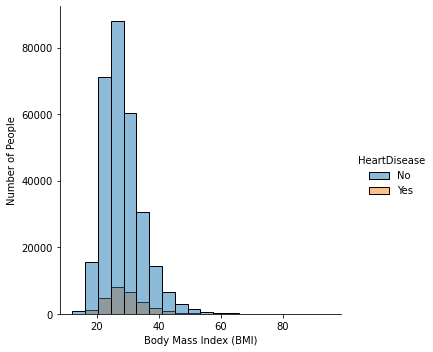

In [12]:
# BMI - Evenly Distributed Histogram: People with Heart Disease
plt.figure(figsize=(5, 6))
ax = sns.displot(x='BMI', hue='HeartDisease', data=df, bins=20, kind='hist')
ax.set(xlabel='Body Mass Index (BMI)', ylabel='Number of People')
plt.show()

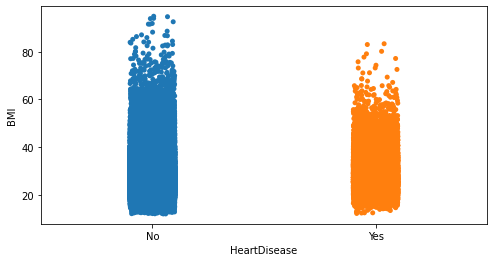

In [13]:
# Heart Disease vs BMI
plt.figure(figsize=(8,4))
sns.stripplot(data=df,x="HeartDisease",y="BMI")
ax.set(xlabel='Heart Disease', ylabel='Body Mass Index (BMI)')
plt.show()

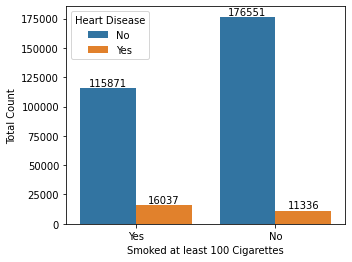

In [14]:
# Smokers vs Nonsmokers: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='Smoking', hue='HeartDisease')
ax.set(xlabel='Smoked at least 100 Cigarettes', ylabel='Total Count')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

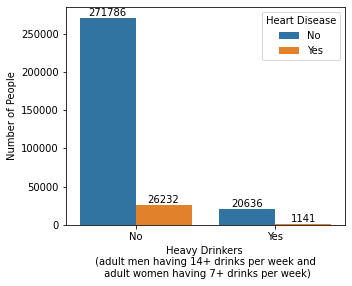

In [15]:
# Heavy vs Nonheavy drinkers: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='AlcoholDrinking', hue='HeartDisease')
ax.set(xlabel='Heavy Drinkers \n (adult men having 14+ drinks per week and \n adult women having 7+ drinks per week)', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

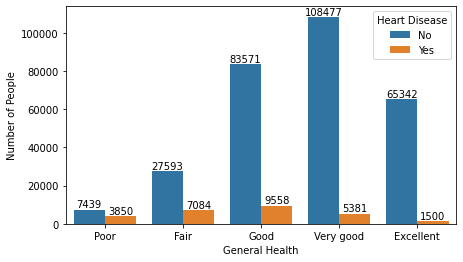

In [16]:
# General Health: People with Heart Disease
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x='GenHealth', hue='HeartDisease', order=['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
ax.set(xlabel='General Health', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

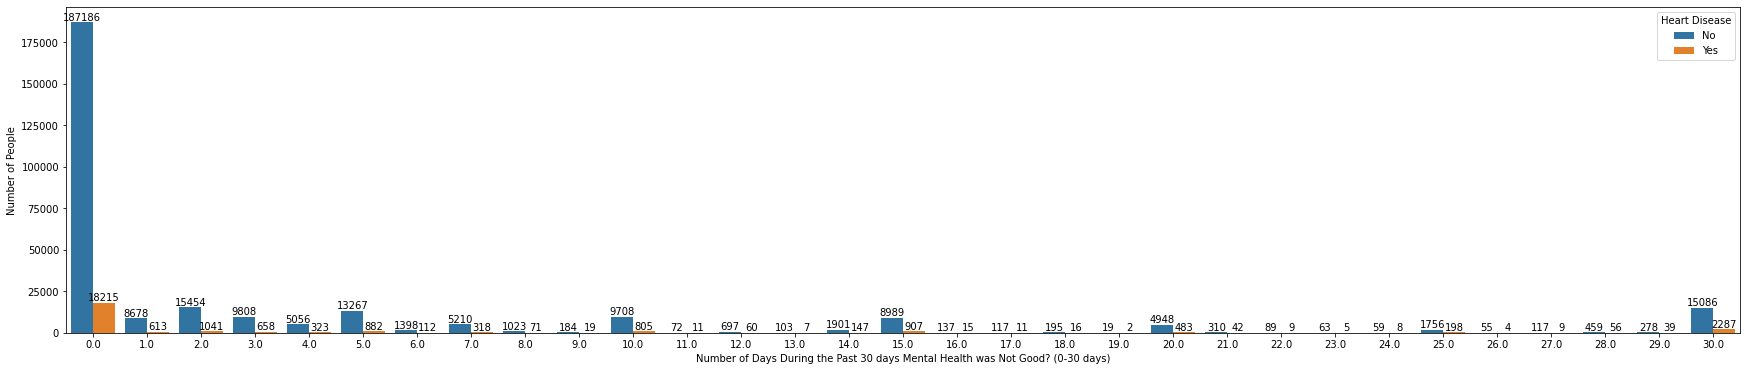

In [17]:
# Mental Health: People with Heart Disease
plt.figure(figsize=(30, 6))
ax = sns.countplot(data=df, x='MentalHealth', hue='HeartDisease')
ax.set(xlabel='Number of Days During the Past 30 days Mental Health was Not Good? (0-30 days)', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

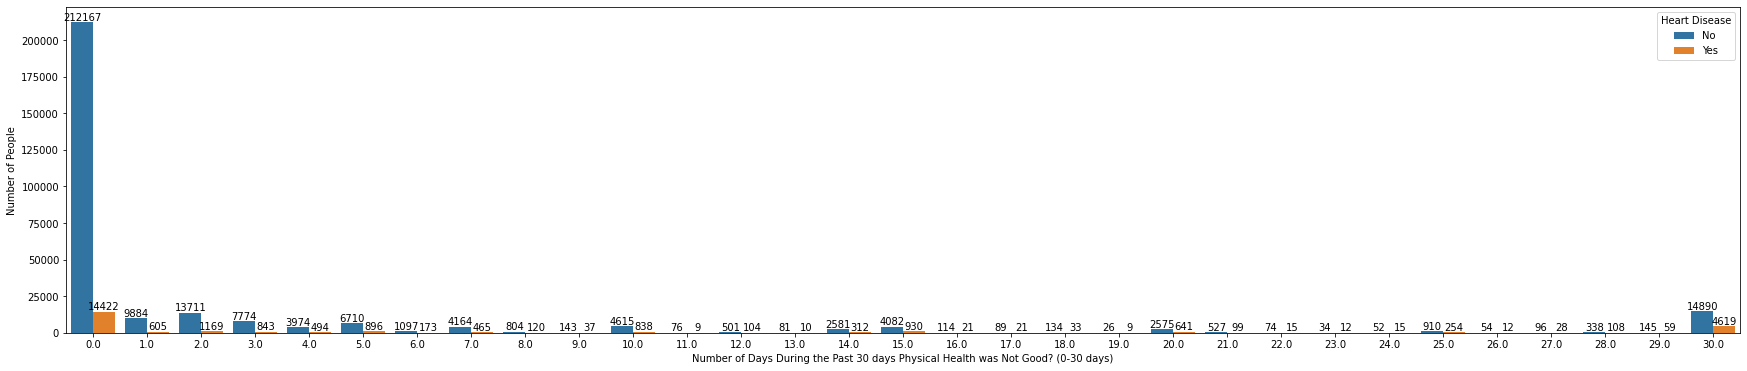

In [18]:
# Physical Health: People with Heart Disease
plt.figure(figsize=(30, 6))
ax = sns.countplot(data=df, x='PhysicalHealth', hue='HeartDisease')
ax.set(xlabel='Number of Days During the Past 30 days Physical Health was Not Good? (0-30 days)', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

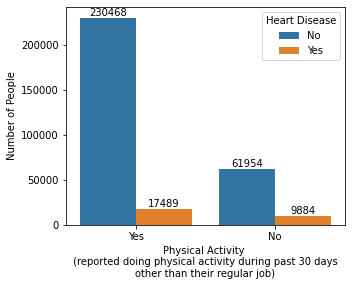

In [19]:
# Physical Activity: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='PhysicalActivity', hue='HeartDisease')
ax.set(xlabel='Physical Activity \n (reported doing physical activity during past 30 days \nother than their regular job)', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

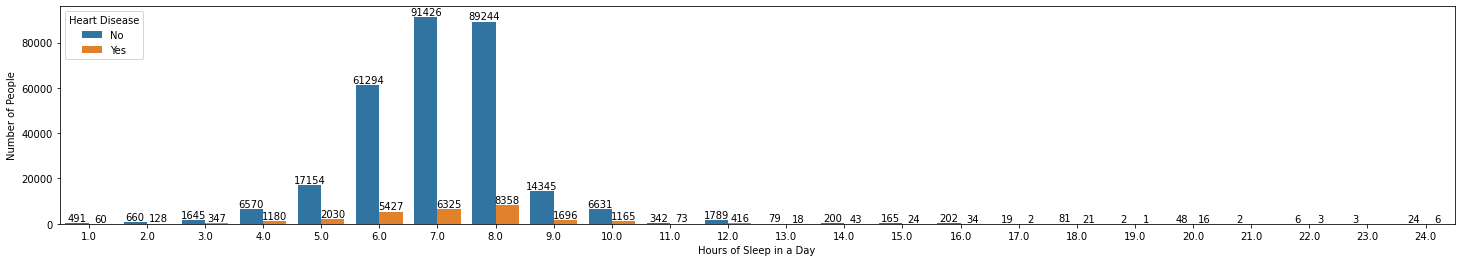

In [20]:
# Sleep Time: People with Heart Disease
plt.figure(figsize=(25, 4))
ax = sns.countplot(data=df, x='SleepTime', hue='HeartDisease')
ax.set(xlabel='Hours of Sleep in a Day', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

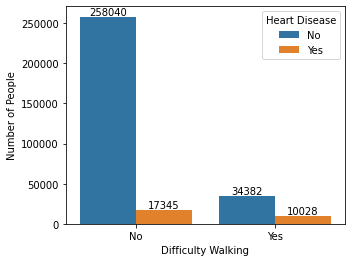

In [21]:
# Difficulty Walking: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='DiffWalking', hue='HeartDisease')
ax.set(xlabel='Difficulty Walking', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

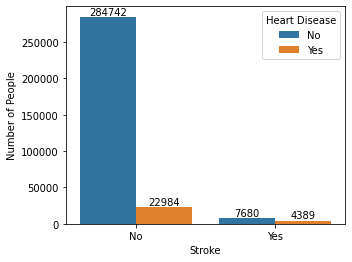

In [22]:
# Stroke: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='Stroke', hue='HeartDisease')
ax.set(xlabel='Stroke', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

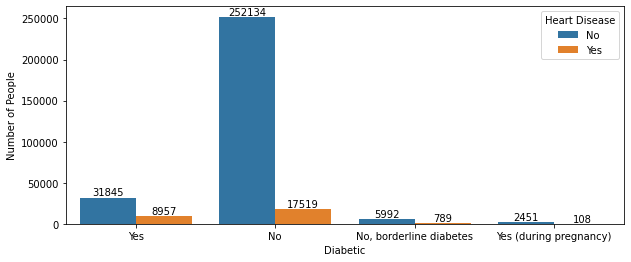

In [23]:
# Diabetic: People with Heart Disease
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='Diabetic', hue='HeartDisease')
ax.set(xlabel='Diabetic', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

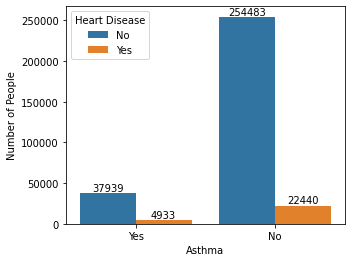

In [24]:
# Asthma: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='Asthma', hue='HeartDisease')
ax.set(xlabel='Asthma', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

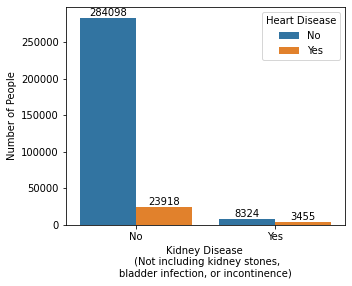

In [25]:
# Kidney Disease: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='KidneyDisease', hue='HeartDisease')
ax.set(xlabel='Kidney Disease \n (Not including kidney stones,\nbladder infection, or incontinence)', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

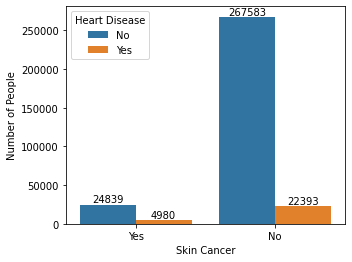

In [26]:
# Skin Cancer: People with Heart Disease
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='SkinCancer', hue='HeartDisease')
#ax = sns.displot(data=df, x='SkinCancer', hue='HeartDisease', multiple='stack')
ax.set(xlabel='Skin Cancer', ylabel='Number of People')
ax.legend(title='Heart Disease')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# **Data Preprocessing**

In [27]:
# Look at oversleepers (Sleep more than 9 hours)
column = df['SleepTime']
# Get count of values greater than 9 
count = column[column > 9].count()
print("People sleeping more than 9 hours: ", count)
print("Percentage of oversleepers: ", count/len(df.SleepTime) * 100)

People sleeping more than 9 hours:  11415
Percentage of oversleepers:  3.569474194405791


## **Encoding Data**

In [28]:
# Encode binary (e.g. Yes/No; Female/Male) categorical columns
le = preprocessing.LabelEncoder()
encoding_lst = []
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    encoding_lst.append([col, le_mapping])

for row in encoding_lst:
    print(*row)
df.head()

HeartDisease {'No': 0, 'Yes': 1}
Smoking {'No': 0, 'Yes': 1}
AlcoholDrinking {'No': 0, 'Yes': 1}
Stroke {'No': 0, 'Yes': 1}
DiffWalking {'No': 0, 'Yes': 1}
Sex {'Female': 0, 'Male': 1}
PhysicalActivity {'No': 0, 'Yes': 1}
Asthma {'No': 0, 'Yes': 1}
KidneyDisease {'No': 0, 'Yes': 1}
SkinCancer {'No': 0, 'Yes': 1}


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIGroup
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1,Underweight
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0,Healthy Weight
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0,Overweight
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1,Healthy Weight
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0,Healthy Weight


In [29]:
# Encoding categorical columns with more than 2 values

ageCategory = {'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8,
             '65-69':9, '70-74':10, '75-79':11, '80 or older':12}
df['AgeCategory'] = df['AgeCategory'].replace(ageCategory)

race = {'American Indian/Alaskan Native': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'White': 4, 'Other': 5}
df['Race'] = df['Race'].replace(race)

diabetic = {'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}
df['Diabetic'] = df['Diabetic'].replace(diabetic)

genHealth = {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
df['GenHealth'] = df['GenHealth'].replace(genHealth)

bmiGroup = {'Underweight':0, 'Healthy Weight':1, 'Overweight':2, 'Obesity':3}
df['BMIGroup'] = df['BMIGroup'].replace(bmiGroup)

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIGroup
0,0,16.60,1,0,0,3.0,30.0,0,0,7,4,3,1,3,5.0,1,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,0,12,4,0,1,3,7.0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,9,4,3,1,1,8.0,1,0,0,2
3,0,24.21,0,0,0,0.0,0.0,0,0,11,4,0,0,2,6.0,0,0,1,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,4,0,1,3,8.0,0,0,0,1


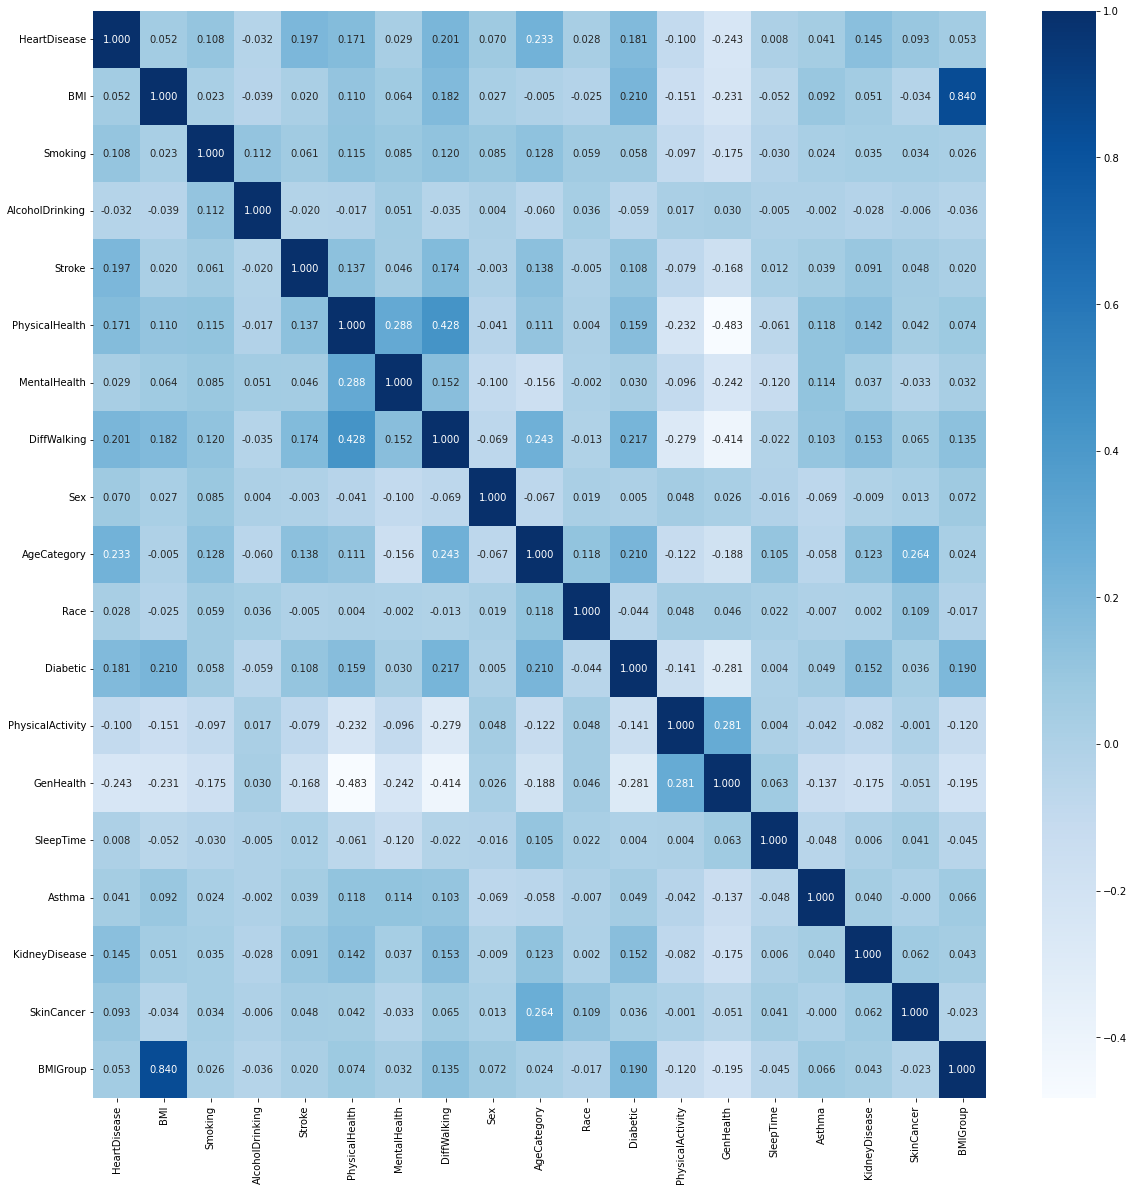

In [30]:
# Correlation Matrix
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt='.3f')
plt.show()

## **Splitting Data**

In [31]:
X = df.drop('HeartDisease',axis=1)
Y = df['HeartDisease']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2023)

## **Dataset Balancing**

### **Using SMOTETomek**

In [ ]:
from imblearn.combine import SMOTETomek
resample = SMOTETomek(random_state=2023)
X_train, y_train = resample.fit_resample(X_train, y_train)
X_train.info()
y_train.value_counts() 

### **Using SMOTE + Nearest Neighbors**

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.2, random_state=2023)
resample = SMOTE(k_neighbors=NearestNeighbors(n_neighbors=5, algorithm="kd_tree"))
X_train2, y_train2 = resample.fit_resample(X_train2, y_train2)
X_train2.info()
y_train2.value_counts() 

In [ ]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

# Save test and training data in Google Drive
data_lst = [X_train, X_test, y_train, y_test]
for data in data_lst:
  save_path = os.path.join(DATADIR, "Data", get_df_name(data) + ".csv")
  with open(save_path, 'w', encoding = 'utf-8-sig') as f:
    data.to_csv(f)

In [ ]:
checkpoint_path = DATADIR + "/checkpoints/cp-epoch-{epoch}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)